In [2]:
import plio
from plio.io.io_gdal import GeoDataset
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import gdal 

rcParams['figure.figsize'] = 20,20


/Users/krodriguez/anaconda3/envs/numel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
data = '/work/users/gvaughan/Data/Hawaii/Kilauea_MaunaLoa/Landsat_8_C1/2013/2013-11-10-n_165198/SensorRad_C1/'

def modvolc(mir, tir, thresh=-.8):
    """
    """
    nti = (mir - tir)/(mir + tir)
    
    anomolies = np.empty(nti.shape)
    anomolies[:] = False
    anomolies[np.isnan(nti)] = np.nan
    anomolies[nti >= thresh] = True
    return anomolies, nti

In [63]:
b7 = GeoDataset(data+'LC08_L1GT_165198_20131110_20170428_01_T2_B7_SensorRad.TIF')
b11 = GeoDataset(data+'LC08_L1GT_165198_20131110_20170428_01_T2_B11_SensorRad.TIF')
b10 = GeoDataset(data+'LC08_L1GT_165198_20131110_20170428_01_T2_B10_SensorRad.TIF')

b11arr = b11.read_array()
b10arr = b10.read_array()
b7arr = b7.read_array()

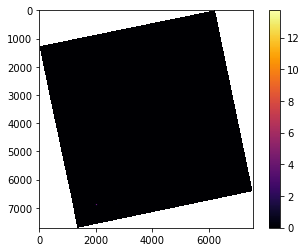

In [5]:
b7arr[b7arr == 0] = np.nan
plt.imshow(b7arr, cmap='inferno')
plt.colorbar()

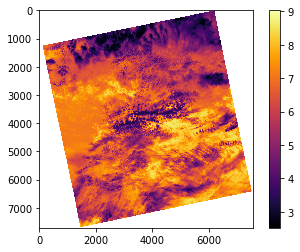

In [7]:
b10arr[b10arr == 0] = np.nan
plt.imshow(b10arr, cmap='inferno')
plt.colorbar()

In [8]:
anomolies, nti = modvolc(b7arr, b10arr, thresh=-.9)

/Users/krodriguez/anaconda3/envs/numel/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


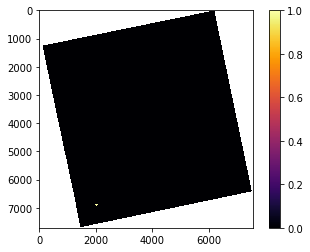

In [9]:
plt.imshow(anomolies, cmap='inferno')
plt.colorbar()

In [12]:
def pixels_to_latlon(geodataset, locs):
    coords = []
    for loc in locs:
        coords.append(geodataset.pixel_to_latlon(loc[1], loc[0]))
    return coords

In [13]:
latlons = pixels_to_latlon(b7, np.argwhere(anomolies==True))
latlons[:10]

[(19.42461123655864, -155.07637145182053),
 (19.424337030488807, -155.07665358794372),
 (19.424340297485955, -155.07636800849633),
 (19.424343564034523, -155.07608242899133),
 (19.416147121893886, -155.28474562911072),
 (19.416150714667925, -155.28446010366727),
 (19.416154306993803, -155.28417457816047),
 (19.416157898871543, -155.28388905259035),
 (19.416161490301135, -155.28360352695694),
 (19.41616508128258, -155.2833180012602)]

In [14]:
np.argwhere(anomolies==True)

array([[6823, 2750],
       [6824, 2749],
       [6824, 2750],
       ...,
       [6928, 2036],
       [6929, 2013],
       [6929, 2014]])

In [66]:
clip = gdal.Translate('b7_clip.tif', data+'LC08_L1GT_165198_20131110_20170428_01_T2_B7_SensorRad.TIF', noData=np.nan, srcWin=[2444, 6743, 555, 370])






In [67]:
# gdal.TranslateOptions?

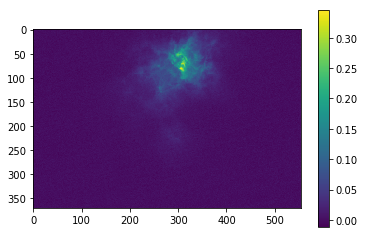

In [68]:
# clip = GeoDataset('b7_clip.tif')
c = clip.ReadAsArray()
c[c==0] = np.nan
plt.imshow(c)
plt.colorbar()

In [61]:
c.max()

0.34579325

In [65]:
ul = np.asarray(b11.latlon_to_pixel(19.445, -155.164))
lr = np.asarray(b11.latlon_to_pixel(19.343, -155.321))
ul, lr, np.abs(ul-lr)

(array([2444, 6743]), array([1889, 7113]), array([555, 370]))

In [ ]:
clip.latlon_to_pixel(19.445, -155.164)